# Project: Performance Evaluation of Bandit Algorithms

- In this project, you will implement several classical bandit algorithms, evluate their performance via numerical comparison and finally gain inspiring intuition.

## Part I: Classical Bandit Algorithms

We consider a time-slotted bandit system ($t=1,2,\ldots$) with three arms.
We denote the arm set as $\{1,2,3\}$.
Pulling each arm $j$ ($ j \in \{1,2,3\}$) will obtain a random reward $r_{j}$, which follows a Bernoulli distribution with mean $\theta_{j}$, *i.e.*, Bern($\theta_{j}$).
Specifically,

\begin{equation*}
	\begin{aligned}
		r_{j} = 
		\begin{cases}
			1, & w.p.\ \theta_{j}, \\
			0, & w.p.\ 1-\theta_{j},			
		\end{cases}
	\end{aligned}
\end{equation*}
where $\theta_{j}, j \in\{1,2,3\}$ are parameters within $(0,1)$.
  
Now we run this bandit system for $N$ ($N \gg 3$) time slots.
In each time slot $t$, we choose one and only one arm from these three arms, which we denote as $I(t) \in \{1,2,3\}$.
Then we pull the arm $I(t)$ and obtain a random reward $r_{I(t)}$.
Our objective is to find an optimal policy to choose an arm $I(t)$ in each time slot $t$ such that the expectation of the aggregated reward over $N$ time slots is maximized, *i.e.*,

\begin{equation*}
	\begin{aligned}
		\max_{I(t),t = 1,\dots,N} \ \  \mathbb{E}\left[\sum_{t=1}^{N} r_{I(t)} \right].
	\end{aligned}  	
\end{equation*}

If we know the values of $\theta_{j},j \in \{1,2,3\}$, this problem is trivial.
Since $r_{I(t)} \sim \text{Bern}(\theta_{I(t)})$,

\begin{equation*}
	\begin{aligned}
		\mathbb{E}\left[\sum_{t=1}^N r_{I(t)} \right] 
		= \sum_{t=1}^{N} \mathbb{E}[r_{I(t)}] 
		= \sum_{t=1}^N \theta_{I(t)}.
	\end{aligned} 	
\end{equation*}

Let $I(t) = I^{*} = \mathop{\arg \max}\limits_{ j \in \{1,2,3\}} \ \theta_j$ for $t=1,2,\ldots,N$, then 

\begin{equation*}
	\begin{aligned}
		\max_{I(t),t=1,\ldots,N} \ \  \mathbb{E}\left[\sum_{t=1}^N r_{I(t)} \right] = N \cdot \theta_{I^*}.
	\end{aligned} 	
\end{equation*}

However, in reality, we do not know the values of $\theta_{j},j \in \{1,2,3\}$.
We need to estimate the values $\theta_{j}, j \in \{1,2,3\}$ via empirical samples, and then make the decisions in each time slot. 
Next we introduce three classical bandit algorithms: $\epsilon$-greedy, UCB, and TS, respectively.

### $\epsilon$-greedy Algorithm ($0 \leq \epsilon \leq 1$)
<img src="figures/e-greedy.jpg" width="50%" align='left'>

### UCB (Upper Confidence Bound) Algorithm
<img src="figures/UCB.jpg" width="50%" align='left'>

### TS (Thompson Sampling) Algorithm
<img src="figures/TS.jpg" width="50%" align='left'>

### Problem 1.1

#### Problem State
1. Now suppose we obtain the parameters of the Bernoulli distributions from an oracle, which are shown in the following table. Choose $N=5000$ and compute the theoretically maximized expectation of aggregate rewards over $N$ time slots. We call it the oracle value. Note that these parameters $\theta_{j}, j \in \{1,2,3\}$ and oracle values are unknown to all bandit algorithms.

| Arm $j$ | 1   | 2   | 3   |
|---------|-----|-----|-----|
| $\theta_j$ | 0.7 | 0.5 | 0.4 |

#### Solution
Since the value of $\theta_j$ is given, then we just have to choose the Arm 1 for we have a probability of getting reward to $0.7$, which is the maximum value among the three arms. Thus, the expectation of aggregate rewards over $5000$ slots would be 
$$N\cdot \theta_1 = 0.7 \cdot 5000 = 3500 $$

### Problem 1.2

#### Problem State
2. Implement aforemented three classical bandit algorithms with following settings: 
   
	- $N=5000$
	- $\epsilon$-greedy with $\epsilon \in \{0.1, 0.5, 0.9\}$.
	- UCB with $c \in \{1,5,10\}$.
	- TS with
    	- $\left\{(\alpha_1,\beta_1)=(1,1),(\alpha_2,\beta_2)=(1,1),(\alpha_3,\beta_3)=(1,1)\right\}$ 
    	- $\left\{(\alpha_1,\beta_1)=(601,401),(\alpha_2,\beta_2)=(401,601),(\alpha_3,\beta_3)=(2,3)\right\}$

#### Solution

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math, copy
### Import more packages if you need

In [10]:
### Implementation of epsilon-Greedy:
### n is the number of time slots, epsilon is the parameter of the algorithm
### return the total reward
def greedy(n, epsilon) -> tuple[int, np.ndarray, int]:
    theta = np.array([0.7, 0.5, 0.4], dtype=float)   # used to generate rewards
    theta_guess = np.array([0, 0, 0], dtype=float)  #initilize the vector we will adjust
    count = np.array([0, 0, 0], dtype=int)  #init
    total_r = 0   # this the sum of all rewards
    regrets = 0
    for t in range(0, n):
        choice = np.random.uniform(0, 1)    # used to choose I(t)
        # arm is I(t)
        arm = np.argmax(theta_guess) if choice > epsilon else np.random.choice([0, 1, 2])
        count[arm] += 1
        r = np.random.binomial(1, theta[arm])   # generate the reward
        theta_guess[arm] += 1 / count[arm] * (r - theta_guess[arm])
        total_r += r
        regrets += 0.7 - theta[arm]
    return total_r, theta_guess, regrets

In [11]:
### Implementation of UCB Algorithm:
### n is the number of time slots, c is the parameter of the algorithm
### return the total reward
def UCB(n, c) -> tuple[int, np.ndarray, int]:
    theta = np.array([0.7, 0.5, 0.4], dtype=float)  # used to generate rewards
    theta_guess = np.array([0, 0, 0], dtype=float)
    for i in range(3):
        theta_guess[i] = np.random.binomial(1, theta[i])    # initilize the thetas
    count = np.array([1, 1, 1], dtype=int)
    total_r = 0 
    regrets = 0
    for t in range(4, n+1):
        # arm is the I(t)
        arm = np.argmax(theta_guess + c * np.sqrt(2 * np.log(t) / count))
        count[arm] += 1
        r = np.random.binomial(1, theta[arm])   # reward
        theta_guess[arm] += 1 / count[arm] * (r - theta_guess[arm])
        total_r += r
        regrets += 0.7 - theta[arm]
    return total_r, theta_guess, regrets

In [12]:
### Implementation of TS Algorithm
### n is the number of time slots, a and b are the parameters of the algorithm
### return the total reward

# a = [a1, a2, a3] and b = [b1, b2, b3]
def TS(n, a, b) -> tuple[int, np.ndarray, int]:
    theta = np.array([0.7, 0.5, 0.4], dtype=float)
    beta = np.array([(a[0], b[0]), (a[1], b[1]), (a[2], b[2])], dtype=int)
    total_r = 0
    regrets = 0
    for _ in range(0, n):
        # use this vector to store the expectation of beta distributions
        E_theta = np.array([0, 0, 0], dtype=float)  
        for j in range(3):
            E_theta[j] = np.random.beta(beta[j][0], beta[j][1])
        arm = np.argmax(E_theta)
        r = np.random.binomial(1, theta[arm]) # reward
        beta[arm][0] += r
        beta[arm][1] += 1- r
        total_r += r
        regrets += 0.7 - theta[arm]
    return total_r, beta, regrets

### Problem 1.3

#### Problem State
3. Regard each of the above setting in problem 2 of Part I as an experiment (in total $8$ experiments).
Run each experiment $200$ independent trials (change the random seed).
Plot the final result (in terms of rewards and regrets) averaged over these $200$ trials.

#### Solution

In [13]:
num_trials = 200

In [14]:
## greedy
epsilons = [0.1, 0.5, 0.9]
total_rs = np.array([0, 0, 0], dtype=int)
thetas = np.zeros([3, 3], dtype=float) 
regrets = np.zeros(3, dtype=float)
for k in range(3):
    for i in range(num_trials):
        r, theta, regret = greedy(5000, epsilons[k])
        total_rs[k] += r
        thetas[k] += theta
        regrets[k] += regret
greedy_rewards = total_rs / num_trials
greedy_thetas = thetas / num_trials
greedy_regrets = regrets / num_trials
for i in range(3):
    print("When epsilon = {}, the averaged reward is {:.6f}, regrets are {}, thetas are {}" .format(epsilons[i], greedy_rewards[i], greedy_regrets[i], greedy_thetas[i]))

When epsilon = 0.1, the averaged reward is 3413.460000, regrets are 87.79649999999997, thetas are [0.70008808 0.49858359 0.40410354]
When epsilon = 0.5, the averaged reward is 3078.005000, regrets are 417.4049999999996, thetas are [0.69959206 0.49868574 0.39734867]
When epsilon = 0.9, the averaged reward is 2752.480000, regrets are 750.0660000000003, thetas are [0.70069123 0.50067074 0.40011552]


In [16]:
## UCB
c = [1, 5, 10]
total_rs = np.array([0, 0, 0], dtype=int)
thetas = np.zeros([3, 3], dtype=float) 
regrets = np.zeros(3, dtype=float)
for k in range(3):
    for i in range(num_trials):
        r, theta, regret = UCB(5000, c[k])
        total_rs[k] += r
        thetas[k] += theta
        regrets[k] += regret
ucb_rewards = total_rs / num_trials
ucb_thetas = thetas / num_trials
ucb_regrets = regrets / num_trials
for i in range(3):
    print("When c = {}, the averaged reward is {:.6f}, regrets are {}, thetas are {}" .format(c[i], ucb_rewards[i], ucb_regrets[i], ucb_thetas[i]))

When c = 1, the averaged reward is 3404.850000, regrets are 89.62200000000021, thetas are [0.69918761 0.49077856 0.39214155]
When c = 5, the averaged reward is 2974.755000, regrets are 520.5269999999974, thetas are [0.69883478 0.49923396 0.40025283]
When c = 10, the averaged reward is 2827.670000, regrets are 673.1350000000022, thetas are [0.69976454 0.50149046 0.4001515 ]


In [17]:
## Thompson
a = np.array([[1, 1, 1], [601, 401, 2]])
b = np.array([[1, 1, 1], [401, 601, 3]])
total_rs = np.array([0, 0], dtype=int)
betas = np.zeros([2, 3, 2], dtype=float)
regrets = np.zeros(2, dtype=float)
for k in range(2):
    for i in range(num_trials):
        r, beta, regret = TS(5000, a[k], b[k])
        total_rs[k] += r
        betas[k] += beta
        regrets[k] += regret 
ts_rewards = total_rs / num_trials
ts_betas = betas / num_trials
ts_thetas = np.zeros([2, 3], dtype=float)
ts_regrets = regrets / num_trials
for i in range(2):
    for j in range(3):
        ts_thetas[i][j] = ts_betas[i][j][0] / (ts_betas[i][j][0] + ts_betas[i][j][1])
print("When (a1,b1) = (1,1), (a2,b2) = (1,1), (a3,b3) = (1,1), the total reward is {:.4f}, regrets are {}, \n the thetas are {}" 
      .format(ts_rewards[0], ts_regrets[0], ts_thetas[0]))
print("When (a1,b1) = (601,401), (a2,b2) = (401,601), (a3,b3) = (2,3), the total reward is {:.4f}, regrets are {}, \n the thetas are {}" 
      .format(ts_rewards[1], ts_regrets[1], ts_thetas[1]))

When (a1,b1) = (1,1), (a2,b2) = (1,1), (a3,b3) = (1,1), the total reward is 3479.5450, regrets are 19.203499999999984, 
 the thetas are [0.69946896 0.51301537 0.4142539 ]
When (a1,b1) = (601,401), (a2,b2) = (401,601), (a3,b3) = (2,3), the total reward is 3492.9500, regrets are 8.007000000000003, 
 the thetas are [0.68340387 0.4001996  0.39129063]


### Problem 1.4

#### Problem State
4. Compute the gaps between the algorithm outputs (aggregated rewards over $N$ time slots) and the oracle value. Compare the numerical results of $\epsilon$-greedy, UCB, and TS.
   - Which one is the best?
   - Discuss the impacts of $\epsilon$, $c$, and $\alpha_{j}$, $\beta_{j}$, respectively. 

#### Solution

The gaps are quite easy to obtain:
|Settings      | Reward Gap      | $\theta_1$ Gap |$\theta_2$ Gap|$\theta_3$ Gap|
|--------------|:---------------:|:--------------:|:------------:|-------------:|
|$\epsilon=0.1$| 89.2            | 0.00074943     |-0.00398228   | -0.00545734  |
|$\epsilon=0.5$| 417.725         | -0.00071584    |-0.00012465   | 0.00222336   |
|$\epsilon=0.9$| 751.9           | 0.00061599     | 0.00095699   | -0.00079044  |
|   c = 1      | 90.17           | -1.49749088e-04|8.79916381e-03|7.11603307e-03|
|   c = 5      | 517.555         | -5.47594480e-04|5.49262149e-05|-6.37483779e-04|
|   c = 10     | 673.855         | -1.48195648e-04|-9.10170094e-05|7.04447122e-04|
|[(1,1),(1,1),(1,1)]| 18.6       | 0.00018419     |-0.00884486   |-0.01106155   |
|[(601,401),(401,601),(2,3)]|10.6| 0.01716786     |0.0998004     |0.00431985    |

We can see that **TS** is the best algorithm in this certain situation. And we below are some explanaitons:

1. Greedy: The interval for $\epsilon$ is $[0, 1]$, so we can find the relation between its value and the averaged total rewards, results are shown in Figure 1. We can clearly see that as $\epsilon$ increases, the averaged total rewards decrease
2. UCB: We set the value of c from 0 to 100(c is an integer), the results are shown in Figure 2. When c increases, the averaged total rewards decrease
3. TS: Recall that we have initialized the pair $(\alpha_j,\beta_j)$ as the prior, and we can assume that for each $j$, we have done $\alpha_j+\beta_j$ trials with $\alpha_j$ times rewards being 1. Thus, if we set the prior whose expectation($\alpha_j/(\alpha_j+\beta_j)$) is closer to the real $\theta_j$, the total reward woulde be closer to the analytic maximum. For instance, if the initial pair is $[(7,3),(5,5),(4,6)]$, the gap could be less than 5. Also, notice that when $\alpha_j$ or $\beta_j$ is really large, then according to conjugacy, the expectation will change little(the posterior distribution also changes little), then, pair $[(700, 300),(500, 500), (400, 600)]$ can achieve a even more stable and better result.

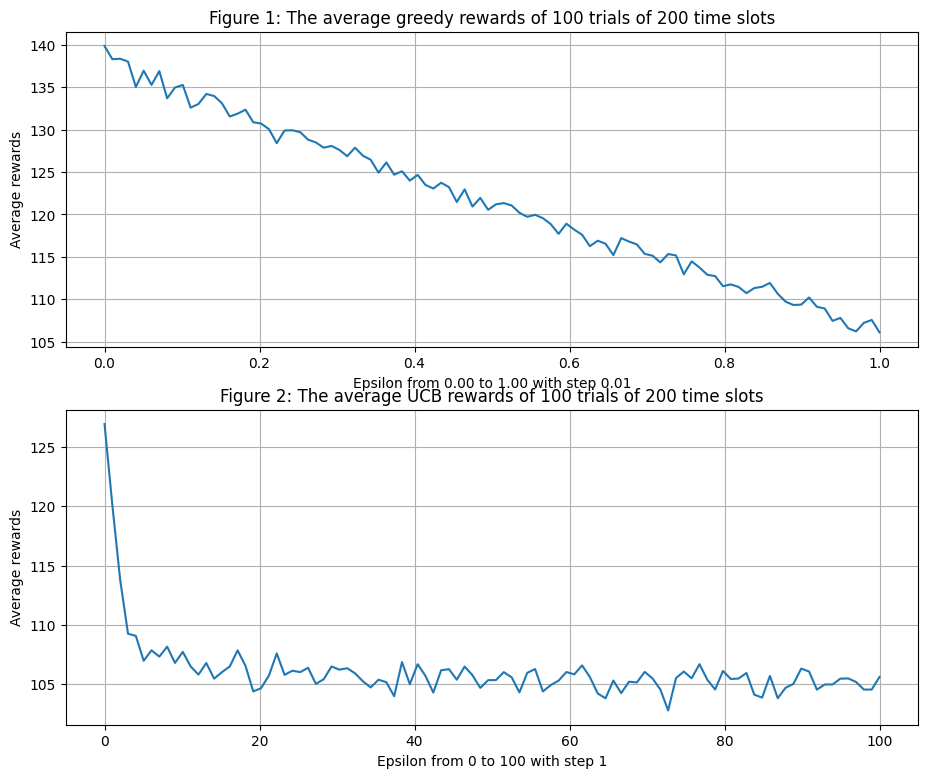

In [ ]:
# PLOT
## greedy -> epsilons
epsilons = np.linspace(0, 1, 100)
total_rs = np.zeros(100, dtype=int)
for k in range(100):
    for i in range(100):
        r, theta = greedy(200, epsilons[k])
        total_rs[k] += r
greedy_rewards = total_rs / 100

## UCB -> c
c = np.linspace(0, 100, 100)
total_rs = np.zeros(100, dtype=int)
thetas = np.zeros([100, 3], dtype=float) 
for k in range(100):
    for i in range(100):
        r, theta = UCB(200, c[k])
        total_rs[k] += r
        thetas[k] += theta
ucb_rewards = total_rs / 100

fig = plt.figure()
fig.set_size_inches(11, 9)
plt.subplot(2, 1, 1)
plt.plot(epsilons, greedy_rewards, scalex=3, scaley=12)
plt.grid(visible=True)
plt.title("Figure 1: The average greedy rewards of 100 trials of 200 time slots")
plt.xlabel("Epsilon from 0.00 to 1.00 with step 0.01")
plt.ylabel("Average rewards")

plt.subplot(2, 1, 2)
plt.plot(c, ucb_rewards, scalex=5, scaley=10)
plt.grid(visible=True)
plt.title("Figure 2: The average UCB rewards of 100 trials of 200 time slots")
plt.xlabel("Epsilon from 0 to 100 with step 1")
plt.ylabel("Average rewards")
plt.show()

### Problem 1.5

#### Problem State
5. Give your understanding of the exploration-exploitation trade-off in bandit algorithms.

#### Solution
1. Exploration means that we want to try something new and to obtain more information, while exploitation means we stick to current plan and make full use of the information we have. And they are all correlated with the belief(information) of the current situation. It is similar to find the maximum value of a function that we do not know its analytic expression: exploitation is the local maximum, and exploration is to find the global maximum. However, if we stick to the local maximum, we may miss the global one. On the other hand, if we always want to find the global maximum, we may not get what we want, especially if the source is limited, it is simply a waste of time and effort.
2. Algorithm-Analysis:
    1. $\epsilon$ represent the choice between exploration and exploitation, when $\epsilon$ becomes larger, we have more “exploration” trials. Since in every time slot $t$, we all have the same probability to do some exploration, thus, the exploration and exploitation stages are interacted, the strategy is rather trivial.
    2. c controls the uncertainty and the possible upper bound. In UCB, if arm 2 is chosen only for fews times while arm 1 is chosen for many times, then this condition gives the exploration for arm 2(the arm that we choose for few time or the arm we do not understand enough) more meaning in the whole game. When t is large, $c\sqrt(\log(t)/count(j))$ will not effect the comparation of the $\theta$, which means natrually leads to more expoitation.
    3. Like what is explained in problem 1.4, adjusting the prior is the process of both exploration and exploitation, with a prior more close to real oracle values and a larger base, the outcome will be better. And if we look closer at TS with the prior $[(601,401),(401,601),(2,3)]$, we can find that its esitmate for oracle values are really bad. It is because that it sacrifices the chance of obtaining the orcale information to achieve a higher reward instead. Or we can think that it has a few exploration stage, because it believes it has found the global maximum: to pull arm 1. Then it will make full use of the exploitation.

### Problem 1.6

#### Problem State
6. We implicitly assume the reward distribution of these three arms are independent. How about the dependent case?
	Can you design an algorithm to exploit such information to obtain a better result?

#### Solution
1. The first thing that comes to mind is to define what is "dependent". We think of using a Indicator to define the event:
    $$I_j = \begin{cases} 1, & \text{arm j gives reward 1} \\ 0, & \text{otherwise} \end{cases}$$
    and then use **Bayes Rules** to find the correlation between them. However, it is difficult to implement in practical, since this kind of dependence is ***time-related***: the current outcome may have an impact on the later one, as a result, we may have to introduce another r.v. $t$ to denote time. And in every time slot, we can only obtain the information of a single arm, it would be extremely difficult to infer the underlying correlations.
2. The second thing that comes to mind would be **MVN**. It is that when the $Corr(...) = 0$, then they are surely independent. Then we can regard the three distribution as r.v.s that is distributed as  $\mathcal{N}(\mu_j, \sigma_j^2)$. Then by **Normal conjugacy**, we just need to adjust $\mu_j$ to its real value and make $\sigma$ close to 0. However, the most difficult part is to adjust those two parameters, because the relation between Normal and Bionomial is not that strong, it is hard to find the physical connection.
3. We then search the Internet and find a paper named [Multi-armed Bandit Problems with Dependent Arms](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=ec2447e5bab9a5e7738c17d831404b238b11fe45) which uses MDP. To be honest, it is hard to understand what they are doing. But what is important is that they are introducing **clusters** to simplify the process, which is a good choice to try.
4. At last, based on that TS is the best algorithm, we do some simple improvement on it. Consider the following situation: 
   ```
    The oracle values are fixed as [0.65, 0.54, 0.45]
    At any time slot, if we pull arm j, its oracle value will multiple 0.9, while we randomly  choose another arm except j to multiple 1.1
    The interval for oracle values are [0.3, 0.7]
   ```
   There is a key point in the three algorithms: in most of the time, it will choose the arm which has the **maximum** oracle value. But such case, the oracle values are changing fast, we can't always choose the largest one. Thus, we have to do some adjustments.
   1. We add a vector `count` to denote the times of the arm being pulled
   2. When find the max $\hat{\theta_j}$, we will subtract somethind(c is a constant):
        ```python
        E_theta[j] = np.random.beta(beta[j][0], beta[j][1]) - c * count[j] / t
        ```
   3. When adjusting the parameters of the beta distribution, we will multiple 2.
The code is given below. Where we set beta and constant c to be $[(1,1),(1,1),(1,1)]$ and $0.7$. 

    The key adjustment is to record the times the arm is pulled. If the arms are dependent, we have to let the algorithm do more `explorations`, and this is why we introduce the constant c and all others.

In [ ]:
# New algorithm under the new situation
def real_life(n:int, a:np.ndarray, b:np.ndarray, c:int) -> int:
    '''
    The real-life method
    n is the time slot
    a and b are the coefficients for beta distribution
    c is a constant 
    we will return the total reward
    '''
    theta = np.array([0.65, 0.54, 0.45], dtype=float)
    beta = np.array([(a[0], b[0]), (a[1], b[1]), (a[2], b[2])], dtype=int)
    total_r = 0
    count = np.zeros(3, dtype=int)
    for t in range(1, n+1):
        # use this vector to store the expectation of beta distributions
        E_theta = np.array([0, 0, 0], dtype=float)  
        for j in range(3):
            E_theta[j] = np.random.beta(beta[j][0], beta[j][1]) - c * count[j] / t
        arm = np.argmax(E_theta)
        r = np.random.binomial(1, theta[arm]) # reward
        beta[arm][0] += 2 * r
        beta[arm][1] += 2 * (1 - r)
        total_r += r
        count[arm] += 1
        ### the new rules
        theta[arm] = theta[arm] * 0.9 if theta[arm] * 0.9 >= 0.3 else 0.3
        evict = np.random.choice(np.delete(np.array([0, 1, 2]), arm))
        theta[evict] = theta[evict] * 1.1 if theta[evict] * 1.1 <= 0.7 else 0.7
    return total_r

def TS(n, a, b) -> int:
    theta = np.array([0.65, 0.54, 0.45], dtype=float)
    beta = np.array([(a[0], b[0]), (a[1], b[1]), (a[2], b[2])], dtype=int)
    total_r = 0
    for t in range(0, n):
        # use this vector to store the expectation of beta distributions
        E_theta = np.array([0, 0, 0], dtype=float)  
        for j in range(3):
            E_theta[j] = np.random.beta(beta[j][0], beta[j][1])
        arm = np.argmax(E_theta)
        r = np.random.binomial(1, theta[arm]) # reward
        beta[arm][0] += r
        beta[arm][1] += 1- r
        total_r += r
        theta[arm] = theta[arm] * 0.9 if theta[arm] * 0.9 >= 0.3 else 0.3
        evict = np.random.choice(np.delete(np.array([0, 1, 2]), arm))
        theta[evict] = theta[evict] * 1.1 if theta[evict] * 1.1 <= 0.7 else 0.7
    return total_r

def UCB(n, c) -> int:
    theta = np.array([0.65, 0.54, 0.45], dtype=float)  # used to generate rewards
    theta_guess = np.array([0, 0, 0], dtype=float)
    for i in range(3):
        theta_guess[i] = np.random.binomial(1, theta[i])    # initilize the thetas
    count = np.array([1, 1, 1], dtype=int)
    total_r = 0 
    for t in range(4, n+1):
        # arm is the I(t)
        arm = np.argmax(theta_guess + c * np.sqrt(2 * np.log(t) / count))
        count[arm] += 1
        r = np.random.binomial(1, theta[arm])   # reward
        theta_guess[arm] += 1 / count[arm] * (r - theta_guess[arm])
        total_r += r
        theta[arm] = theta[arm] * 0.9 if theta[arm] * 0.9 >= 0.3 else 0.3
        evict = np.random.choice(np.delete(np.array([0, 1, 2]), arm))
        theta[evict] = theta[evict] * 1.1 if theta[evict] * 1.1 <= 0.7 else 0.7
    return total_r

def greedy(n, epsilon) -> int:
    theta = np.array([0.7, 0.5, 0.4], dtype=float)   # used to generate rewards
    theta_guess = np.array([0, 0, 0], dtype=float)  #initilize the vector we will adjust
    count = np.array([0, 0, 0], dtype=int)  #init
    total_r = 0   # this the sum of all rewards
    for t in range(0, n):
        choice = np.random.uniform(0, 1)    # used to choose I(t)
        # arm is I(t)
        arm = np.argmax(theta_guess) if choice > epsilon else np.random.choice([0, 1, 2])
        count[arm] += 1
        r = np.random.binomial(1, theta[arm])   # generate the reward
        theta_guess[arm] += 1 / count[arm] * (r - theta_guess[arm])
        total_r += r
        theta[arm] = theta[arm] * 0.9 if theta[arm] * 0.9 >= 0.3 else 0.3
        evict = np.random.choice(np.delete(np.array([0, 1, 2]), arm))
        theta[evict] = theta[evict] * 1.1 if theta[evict] * 1.1 <= 0.7 else 0.7
    return total_r

In [ ]:
r_sum1 = 0
r_sum2 = 0
r_sum3 = 0
r_sum4 = 0
a = [1, 1, 1]
b = [1, 1, 1]
for j in range(100):
    r_sum1 += greedy(5000, 0.5)
    r_sum2 += UCB(5000, 1)
    r_sum3 += TS(5000, a, b)
    r_sum4 += real_life(5000, a, b, 0.7)
print("The averaged total greedy reward with 5000 time slots is {}" .format(r_sum1 / 100))
print("The averaged total UCB reward with 5000 time slots is {}" .format(r_sum2 / 100))
print("The averaged total TS reward with 5000 time slots is {}" .format(r_sum3 / 100))
print("The averaged total real_life reward with 5000 time slots is {}" .format(r_sum4 / 100))

The averaged total greedy reward with 5000 time slots is 2184.44
The averaged total UCB reward with 5000 time slots is 2086.17
The averaged total TS reward with 5000 time slots is 2214.04
The averaged total real_life reward with 5000 time slots is 2213.18


## Part II: Bayesian Bandit Algorithms

There are two arms which may be pulled repeatedly in any order.
Each pull may result in either a success or a failure.
The sequence of successes and failures which results from pulling arm $i$ ($i \in \{1, 2\}$) forms a Bernoulli process with unknown success probability $\theta_{i}$.
A success at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), while an unsuccessful pull yields a zero reward.
At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.
These prior distributions are updated to posterior distributions as arms are pulled.
Since the class of Beta distributions is closed under Bernoulli sampling, posterior distributions are all Beta distributions.
How should the arm to pull next in each time slot be chosen to maximize the total expected reward from an infinite sequence of pulls?

#### Problem State 2.1
1. 	One intuitive policy suggests that in each time slot we should pull the arm for which the current expected value of $\theta_{i}$ is the largest.
	This policy behaves very good in most cases.
	Please design simulations to check the behavior of this policy.

#### Solution

In [ ]:
def demo_policy(n, a, b, theta, r_reward) -> tuple[int, np.ndarray]:
    beta = np.array([(a[0], b[0]), (a[1], b[1])], dtype=int)
    total_r = 0
    for t in range(0, n):
        # use this vector to store the expectation of beta distributions
        E_theta = np.array([0, 0], dtype=float)  
        for j in range(2):
            E_theta[j] = beta[j][0] / (beta[j][0] + beta[j][1])
        arm = np.argmax(E_theta)
        r = np.random.binomial(1, theta[arm])
        beta[arm][0] += r
        beta[arm][1] += 1- r
        total_r += r * pow(r_reward,t)
    return total_r
                
                     
a = np.array([1, 1])
b = np.array([1, 1])
total_rs = 0
theta = np.array([0.5, 0.9], dtype=float)
num_trials = 20
r_reward = 0.3

for i in range(num_trials):
    r = demo_policy(50, a, b, theta, r_reward)
    total_rs += r
po1_rewards = total_rs / num_trials

print("When thetas = [0.5, 0.9], r_reward = 0.3:\n the total reward is {:.4f}" 
      .format(po1_rewards))

When thetas = [0.5, 0.9], r_reward = 0.3:
 the total reward is 0.8005


#### Problem State 2.2
2. However, such intuitive policy is unfortunately not optimal.
	Please provide an example to show why such policy is not optimal. 

#### Solution
For example:$$ $$
 The actual value of $\theta$ is [0.8, 0.3]. While at the early stage, if most of times pull the second arm, the results are success; and most of times pull the first arm, the result are failure. Then we may get an estimated value of $\theta$ that is far from the actual value of $\theta$, like [0.1, 0.9]. So we will choose the second arm based on the estimated value later. If the frequency of success basically follows the true value of $\theta$, our estimated value will be corrected to tend towards the true value. The proccess of correction might takes a long time, so the price of correction is less success. And when we finally get the estimated value of $\theta_1$ is bigger than $\theta_2$, the value of t might be very large, which means a much lower reward per roll that can not cover up the loss before.

#### Problem State 2.3
3. For the expected total reward under an optimal policy, show that the following recurrence equation holds:

\begin{equation*}
		\begin{aligned}
			R_{1}(\alpha_{1},\beta_{1}) 
			= & \frac{\alpha_{1}}{\alpha_{1}+\beta_{1}} [1+\gamma R(\alpha_{1} + 1, \beta_{1}, \alpha_{2}, \beta_{2})] \\
				& + \frac{\beta_{1}}{\alpha_{1} + \beta_{1}} [\gamma R(\alpha_{1}, \beta_{1} + 1, \alpha_{2}, \beta_{2})]; \\
			R_{2}(\alpha_{2}, \beta_{2}) 
			= & \frac{\alpha_{2}}{\alpha_{2} + \beta_{2}} [1 + \gamma R(\alpha_{1}, \beta_{1}, \alpha_{2} + 1, \beta_{2})] \\
				& + \frac{\beta_{2}}{\alpha_{2} + \beta_{2}} [\gamma R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2} + 1)]; \\
			R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2}) 
			= & \max \left\{ R_{1}(\alpha_{1}, \beta_{1}), R_{2}(\alpha_{2}, \beta_{2}) \right\}.
		\end{aligned}  	
	\end{equation*}

#### Solution

R is the total reward we could get under an optical policy, R1 is the total reward we could get if we choose arm 1 on the first roll, and R2 is the total reward we could get if we choose arm 2 on second roll. $$ $$
Take R1 as example: $$ $$
For $R_{1}(\alpha_{1},\beta_{1})$, $\frac{\alpha_{1}}{\alpha_{1}+\beta_{1}}$ is the estimated value of $\theta_{1}$ $$ $$
If the reuslt of the first roll is success, then the value of $\alpha$ and $\beta$ for arm 1 will be updated to $\alpha+1$ and $\beta$. We can consider the second roll as a beginning of an infinite sequence of rolls, and its total reward is $R(\alpha_{1}+1,\beta_{1},\alpha_{2},\beta_{2}).$ $$ $$
Suppose that the result of the first roll is A, and A=1 means success.$$ $$
Then $R_{1}(\alpha_{1},\beta_{1}|A=1)=\gamma^0+\gamma R(\alpha_{1}+1,\beta_{1},\alpha_{2},\beta_{2})=1+\gamma R(\alpha_{1}+1,\beta_{1},\alpha_{2},\beta_{2})$ $$ $$
Similarly, we can get that $R_{1}(\alpha_{1},\beta_{1}|A=0)=0*\gamma^0+\gamma R(\alpha_{1},\beta_{1}+1,\alpha_{2},\beta_{2})=\gamma R(\alpha_{1},\beta_{1}+1,\alpha_{2},\beta_{2})$ $$ $$
And according to LOTE: $R_{1}(\alpha_{1},\beta_{1})\\=P(A=1)*R_{1}(\alpha_{1},\beta_{1}|A=1)+P(A=0)*R_{1}(\alpha_{1},\beta_{1}|A=0)\\=\frac{\alpha_{1}}{\alpha_{1}+\beta_{1}}[1+\gamma R(\alpha_{1}+1,\beta_{1},\alpha_{2},\beta_{2})]+\frac{\beta_{1}}{\alpha_{1}+\beta_{1}}\gamma R(\alpha_{1},\beta_{1}+1,\alpha_{2},\beta_{2})$ $$ $$
Similary, $R_{2}(\alpha_{2},\beta_{2})=\frac{\alpha_{2}}{\alpha_{2}+\beta_{2}}[1+\gamma R(\alpha_{1},\beta_{1},\alpha_{2}+1,\beta_{2})]+\frac{\beta_{2}}{\alpha_{2}+\beta_{2}}\gamma R(\alpha_{1},\beta_{1},\alpha_{2},\beta_{2}+1)$ $$ $$
Obviously, the total reward we could get under an optimal policy should be the best one between choosing arm 1 or choosing arm 2 on the first roll.$$ $$
So $R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2})=\max \left\{ R_{1}(\alpha_{1}, \beta_{1}), R_{2}(\alpha_{2}, \beta_{2}) \right\}.$

#### Problem State 2.4
4. For the above equations, how to solve it exactly or approximately? 

#### Solution

We use a recursive algorithm. $$ $$
In general, we use the above equation. When reaching a certain depth, we assume that it has reached an extreme situation. In this case, R must be the reward for selecting the arm with the largest expected value of $\theta_{i}$ throughout the entire process.

In [ ]:
def expect_rewards(a1, b1, a2, b2, r_reward, r_count):
    if r_count > 5:
        return max(a1 / (a1 + b1) / (1 - r_reward), a2 / (a2 + b2) / (1 - r_reward))
    return max(a1 / (a1 + b1) * (1 + r_reward * expect_rewards(a1 + 1, b1, a2, b2, r_reward, r_count+1))
                  + b1 / (a1 + b1) * r_reward * expect_rewards(a1, b1 + 1, a2, b2, r_reward, r_count+1),
                  a2 / (a2 + b2) * (1 + r_reward * expect_rewards(a1, b1, a2 + 1, b2, r_reward, r_count+1))
                  + b2 / (a2 + b2) * r_reward * expect_rewards(a1, b1, a2, b2 + 1, r_reward, r_count+1))

#### Problem State 2.5
5. Find the optimal policy.

#### Soluiton

We will modify the initial policy and choose the arm with the highest R value instead of the one with the largest expected value of $\theta_{i}$

In [ ]:
def optimal_policy(n, a, b, theta, r_reward) -> tuple[int, np.ndarray]:
    beta = np.array([(a[0], b[0]), (a[1], b[1])], dtype=int)
    total_r = 0
    for t in range(0, n):
        # use this vector to store the expectation of rewards 
        E_r = np.array([0, 0], dtype=float)  
        E_r[0] = ( beta[0][0] / (beta[0][0] + beta[0][1]) * 
                  (1 + r_reward * 
                  expect_rewards(beta[0][0] + 1, beta[0][1], beta[1][0], beta[1][1], r_reward, 0)) 
                  + beta[0][1] / (beta[0][0] + beta[0][1]) * r_reward * 
                  expect_rewards(beta[0][0], beta[0][1] + 1, beta[1][0], beta[1][1],  r_reward, 0))
        E_r[1] = ( beta[1][0] / (beta[1][0] + beta[1][1]) * 
                  (1 + r_reward * 
                   expect_rewards(beta[0][0], beta[0][1], beta[1][0] + 1, beta[1][1],  r_reward, 0)) 
                  + beta[1][1] / (beta[1][0] + beta[1][1]) * r_reward * 
                  expect_rewards(beta[0][0], beta[0][1], beta[1][0], beta[1][1] + 1,  r_reward, 0))                                         
        arm = np.argmax(E_r)
        r = np.random.binomial(1, theta[arm])
        beta[arm][0] += r
        beta[arm][1] += 1- r
        total_r += r * pow(r_reward,t)
    return total_r
                   
a = np.array([1, 1])
b = np.array([1, 1])
total_rs = 0
theta = np.array([0.5, 0.9], dtype=float)
num_trials = 20
r_reward = 0.3

for i in range(num_trials):
    r = optimal_policy(50, a, b, theta, r_reward)
    total_rs += r
    
op_rewards = total_rs / num_trials

print("When thetas = [0.5 0.9], r_reward = 0.3:\n the total reward is {:.4f}" 
      .format(op_rewards))

When thetas = [0.5 0.9], r_reward = 0.3:
 the total reward is 0.9905
